In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-02-25 07:34:52--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-02-25 07:34:52 (26.1 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in 

Using TensorFlow backend.


... done downloading pretrained model!


In [2]:
!unzip Mask_RCNN_basic_1.zip

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/.gitignore    
replace Mask_RCNN/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/LICENSE       
replace Mask_RCNN/MANIFEST.in? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/MANIFEST.in   
replace Mask_RCNN/mrcnn/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/mrcnn/config.py  
replace Mask_RCNN/mrcnn/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/mrcnn/model.py  
replace Mask_RCNN/mrcnn/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/mrcnn/m_rcnn.py  
replace Mask_RCNN/mrcnn/parallel_model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/mrcnn/parallel_model.py  
replace Mask_RCNN/mrcnn/utils.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/mrcnn/utils.py  
replace Mask_RCNN/mrcnn/visualize.py? [y]es, [n]o, [A]

In [3]:
!nvidia-smi

Fri Feb 25 07:44:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Extract Images
images_path = "Dataset.zip"
annotations_path = "annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/Dataset")

Extracted: 25 images


In [5]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/Dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/Dataset", "val")
print('Validation: %d' % len(dataset_val.image_ids))
class_number = dataset_train.count_classes()
print("Classes: {}".format(class_number))

Annotation json path:  /content/annotations.json
Annotation json path:  /content/annotations.json
Validation: 2
Classes: 1


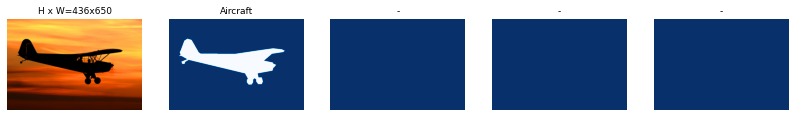

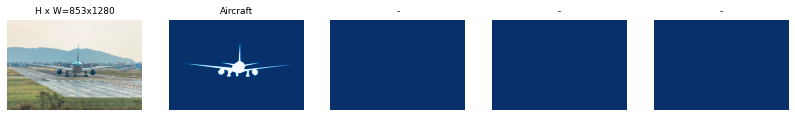

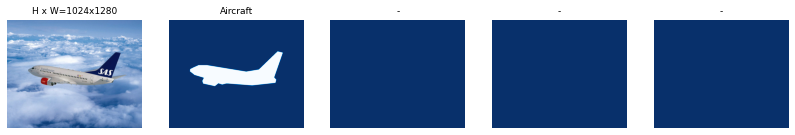

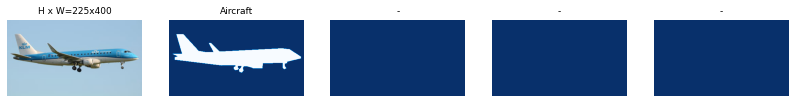

In [6]:
display_image_samples(dataset_train)

In [7]:
#load configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [8]:
#start training
train_head(model, dataset_train, dataset_train, config)

 15/500 [..............................] - ETA: 15:32 - loss: 0.0736

Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-966d391e1b96>", line 2, in <module>
    train_head(model, dataset_train, dataset_train, config)
  File "/content/Mask_RCNN/mrcnn/m_rcnn.py", line 271, in train_head
    layers='heads')
  File "/content/Mask_RCNN/mrcnn/model.py", line 2374, in train
    use_multiprocessing=True,
  File "/tensorflow-1.15.2/python3.7/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py", line 220, in fit_generator
    reset_metrics=False)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training.py", line 1514, in train_on_batch
    outputs = self.train_function(ins)


KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [10]:
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


Loading weights from  /content/Mask_RCNN/logs/object20220225T0747/mask_rcnn_object_0002.h5
Re-starting from epoch 2


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


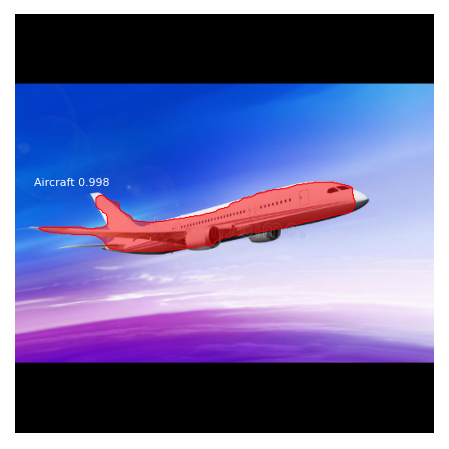

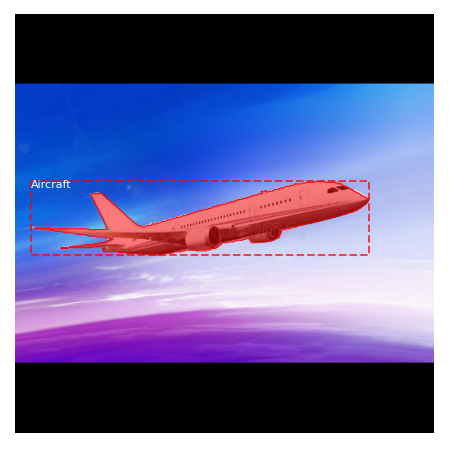

In [11]:
test_random_image(test_model, dataset_val, inference_config)